<a href="https://colab.research.google.com/github/ansar-mazhar/ML-Task-2/blob/main/ML_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Recognition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

Load Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


Normalize Pixels

In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

One Hot Encode Labels

In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Build the CNN Model

In [5]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the Model

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train the Model

In [7]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 45ms/step - accuracy: 0.3909 - loss: 1.6676 - val_accuracy: 0.5696 - val_loss: 1.1979
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 42ms/step - accuracy: 0.6099 - loss: 1.1176 - val_accuracy: 0.6519 - val_loss: 1.0105
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.6706 - loss: 0.9538 - val_accuracy: 0.6754 - val_loss: 0.9344
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.7024 - loss: 0.8602 - val_accuracy: 0.6826 - val_loss: 0.9375
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7309 - loss: 0.7869 - val_accuracy: 0.6732 - val_loss: 0.9592
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.7442 - loss: 0.7455 - val_accuracy: 0.6907 - val_loss: 0.9173
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.7680 - loss: 0.6699 - val_accuracy: 0.6935 - val_loss: 0.9180
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7773 -

Evaluate the Model

In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7058 - loss: 0.9305
Test Accuracy: 70.09%


View Sample Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Predicted: cat


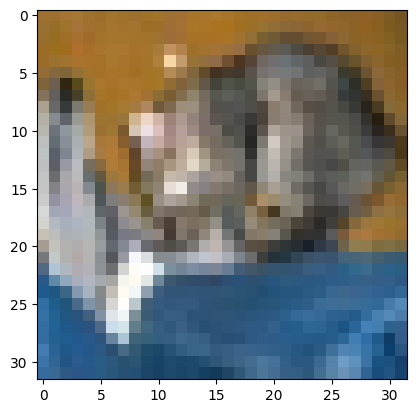

In [9]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.imshow(X_test[0])
prediction = model.predict(np.array([X_test[0]]))
predicted_class = class_names[np.argmax(prediction)]
print(f"Predicted: {predicted_class}")